# Notes from August 5th 2016 #

### The following are issues that arise in the presence of an ice shelf.

#### 1) When ALE is used (with thermodynamics off), pressure gradient errors occur *under* the ice shelf (see plots below).




Time is: 0.00694444444444 days


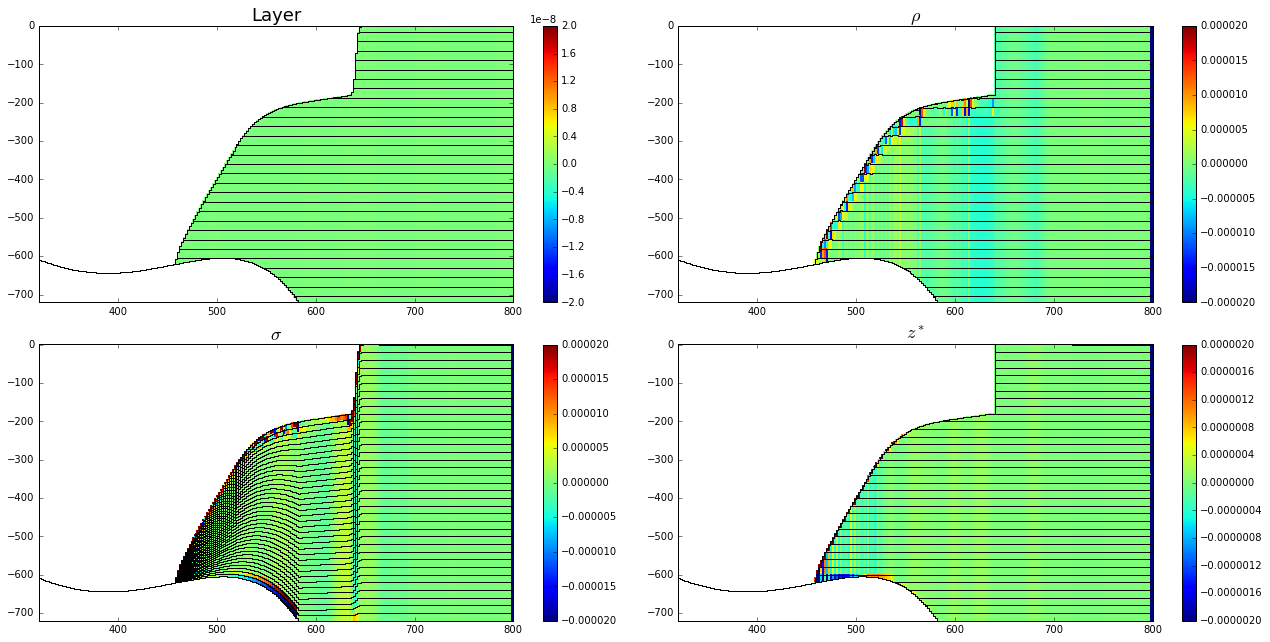

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append('../../plotting/')
from plotting import *
import netCDF4
import numpy as np

path='/lustre/f1/unswept/Gustavo.Marques/MOM6-examples/ocean_only/ISOMIP/TESTS/2D/YES_IS/'
# plot 
prog_file='prog__0001_001.nc'
layer_file = netCDF4.Dataset(path+'layer/'+prog_file)
rho_file = netCDF4.Dataset(path+'rho/'+prog_file)
sigma_file = netCDF4.Dataset(path+'sigma/'+prog_file)
z_file = netCDF4.Dataset(path+'z/'+prog_file)
xq = layer_file.variables['yq'][:] # This is the coordinate of the cell corners (u-points in 1D)
xq = np.concatenate(([0],xq)) # Inserts left most edge of domain in to coordinate
record = 1 
print 'Time is:',layer_file.variables['Time'][record], 'days'
plt.figure(figsize=(18,9))
plt.subplot(2,2,1); plot_section(layer_file, record, xq,i=2,variable='v',clim=(-2e-8,2e-8)); plt.title('Layer', fontsize=18);
plt.subplot(2,2,2); plot_section(rho_file, record, xq,i=2,variable='v',clim=(-2e-5,2e-5)); plt.title(r'$\rho$', fontsize=18);
plt.subplot(2,2,3); plot_section(sigma_file, record, xq,i=2,variable='v',clim=(-2e-5,2e-5));plt.title(r'$\sigma$', fontsize=18);
plt.subplot(2,2,4); plot_section(z_file, record, xq,i=2,variable='v',clim=(-2e-6,2e-6));plt.title(r'$z^*$', fontsize=18);
plt.tight_layout()

#### 2) In layer mode with BULKMIXEDLAYER = True (again, no thermodynamics), pressure gradient errors occur at the ice shelf front (see below). I have tried different ice shelf configurations, including cases where there is an ice shelf (thin or thick) everywhere, and the problem seems related to the different boundary conditions applied under the ice shelf and at the open ocean. Under the ice shelf, I can set the minumum thickness of the ML to HMIX_MIN. However, I cannot do that same at the open ocean (h_ML is always > 0 there).

Time is: 0.0381944444444 days


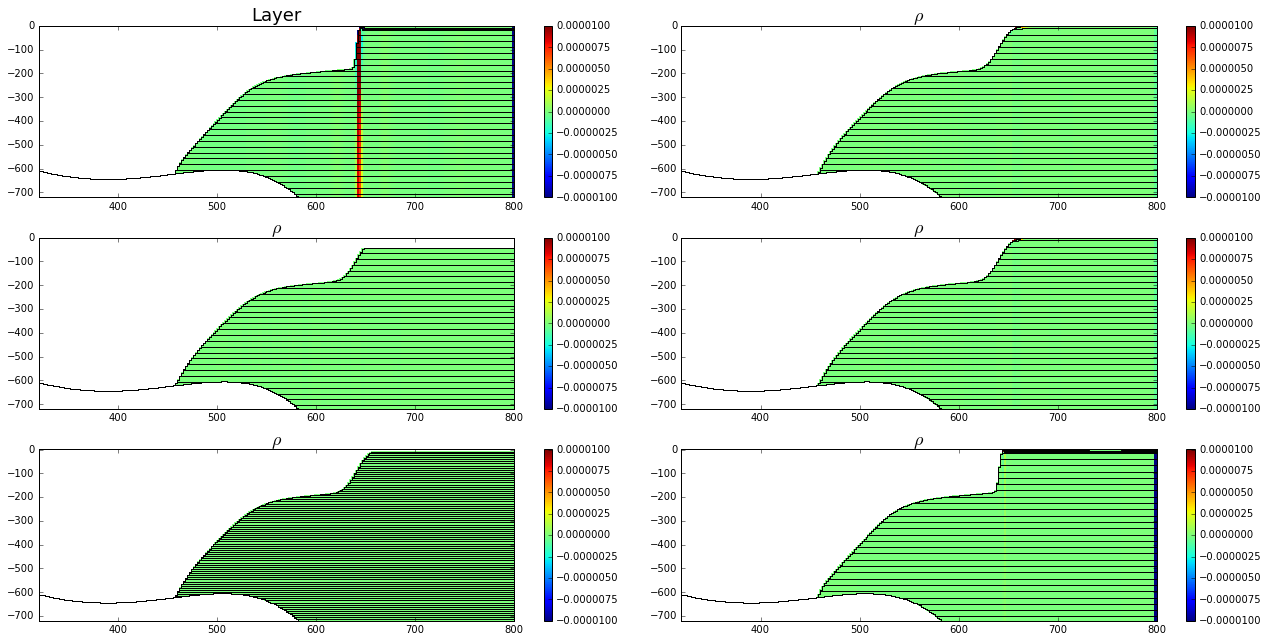

In [32]:
case1 = netCDF4.Dataset(path+'layer_bulk_ml_ideal0/'+prog_file) # first case, steep front
case2 = netCDF4.Dataset(path+'layer_bulk_ml_ideal1/'+prog_file) # thick[thick<0.01]=0.01, ice shelf everywhere,h_ML changes! 
case3 = netCDF4.Dataset(path+'layer_bulk_ml_ideal2/'+prog_file) # thick[thick<50.]=50.0
case4 = netCDF4.Dataset(path+'layer_bulk_ml_ideal3/'+prog_file) # thick[thick<1]=1.
case5 = netCDF4.Dataset(path+'layer_bulk_ml_ideal4/'+prog_file) # thick[thick<10]=10., 100 layers
case6 = netCDF4.Dataset(path+'layer_bulk_ml_ideal5/'+prog_file) #

xq = case1.variables['yq'][:] # This is the coordinate of the cell corners (u-points in 1D)
xq = np.concatenate(([0],xq)) # Inserts left most edge of domain in to coordinate
record = 10 # 10 DT 
print 'Time is:',layer_file.variables['Time'][record], 'days'
plt.figure(figsize=(18,9))
plt.subplot(3,2,1); plot_section(case1, record, xq,i=2,variable='v',clim=(-1e-5,1e-5)); plt.title('Layer', fontsize=18);
plt.subplot(3,2,2); plot_section(case2, record, xq,i=2,variable='v',clim=(-1e-5,1e-5)); plt.title(r'$\rho$', fontsize=18);
plt.subplot(3,2,3); plot_section(case3, record, xq,i=2,variable='v',clim=(-1e-5,1e-5)); plt.title(r'$\rho$', fontsize=18);
plt.subplot(3,2,4); plot_section(case4, record, xq,i=2,variable='v',clim=(-1e-5,1e-5)); plt.title(r'$\rho$', fontsize=18);
plt.subplot(3,2,5); plot_section(case5, record, xq,i=2,variable='v',clim=(-1e-5,1e-5)); plt.title(r'$\rho$', fontsize=18);
plt.subplot(3,2,6); plot_section(case6, record, xq,i=2,variable='v',clim=(-1e-5,1e-5)); plt.title(r'$\rho$', fontsize=18);
plt.tight_layout()

#### 3) When using TRIMMING_USES_REMAPPING = True, the trimming algorithm can lead to a very small layer at the base of the ice shelf (between the bottom of the ocean and the ice shelf). When the thermodynamics is on, this can lead to the creating of mass (see MOM warming message below).

WARNING from PE     0: MOM_diabatic_driver.F90, applyBoundaryFluxesInOut(): Mass created. x,y,dh=       7.000E+00      4.630E+02      1.817E-04

#### I believe this can be fixed by modifying the subrotine cut_off_column_top in MOM_state_initialization.F90. I spent some time trying to find out how to solve this issue, but did not succeed.